In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data=pd.read_csv("crime_data.csv")
df = data.copy()

In [33]:
df.describe()

,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
count,6638.000000,6638.0,6638.00000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000
mean,0.057547,0.0,2.50467,0.751281,34.634378,1.998945,2.948328,0.399970,38.590539,0.996384,0.478909,3.733655
std,0.232903,0.0,1.11541,0.432303,12.797407,0.036809,1.387175,0.492383,15.297202,0.060025,0.499593,1.542971
min,0.000000,0.0,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,2.00000,1.000000,25.000000,2.000000,2.000000,0.000000,27.000000,1.000000,0.000000,3.000000
50%,0.000000,0.0,2.00000,1.000000,33.000000,2.000000,2.000000,0.000000,36.000000,1.000000,0.000000,5.000000
75%,0.000000,0.0,2.00000,1.000000,42.000000,2.000000,5.000000,1.000000,48.000000,1.000000,1.000000,5.000000
max,1.000000,0.0,5.00000,1.000000,83.000000,2.000000,5.000000,2.000000,124.000000,1.000000,1.000000,5.000000


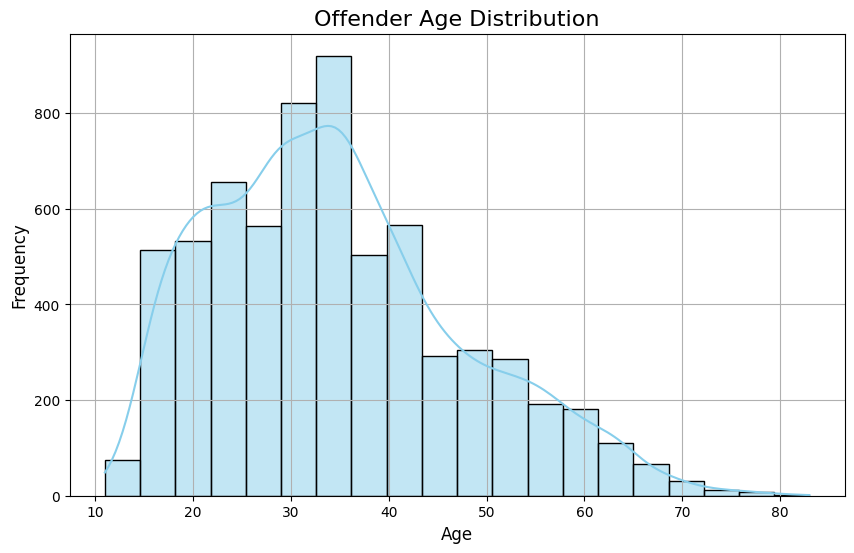

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Offender_Age'], kde=True, color='skyblue', bins=20)
plt.title('Offender Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\salih\AppData\Local\Temp\ipykernel_23760\4197205860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Offender_Gender', palette='pastel')


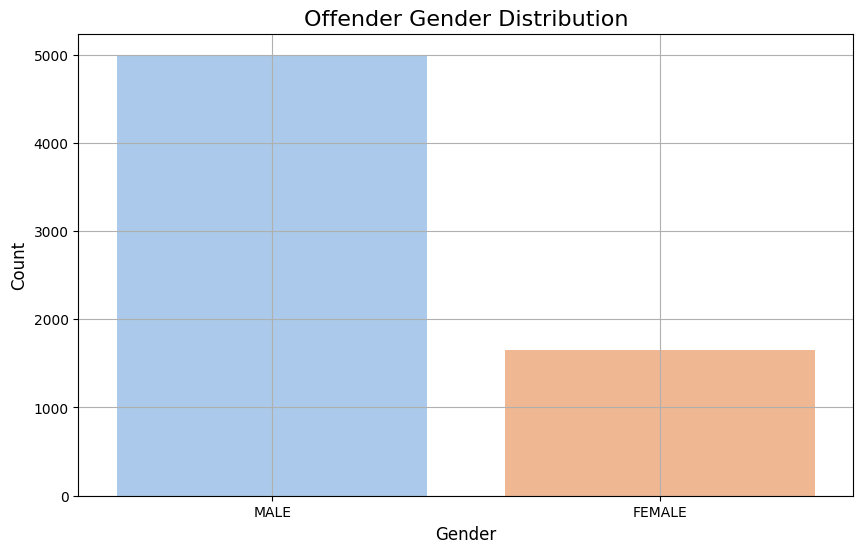

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Offender_Gender', palette='pastel')
plt.title('Offender Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

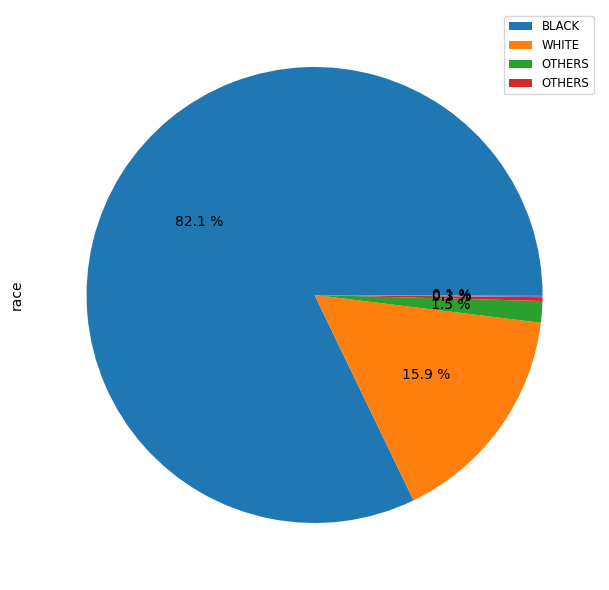

In [34]:
df['Offender_Race'].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='race', legend = True, labels = None, figsize = (10,6))
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize='small', labels = ['BLACK','WHITE','OTHERS','OTHERS'])
plt.tight_layout()
plt.show()

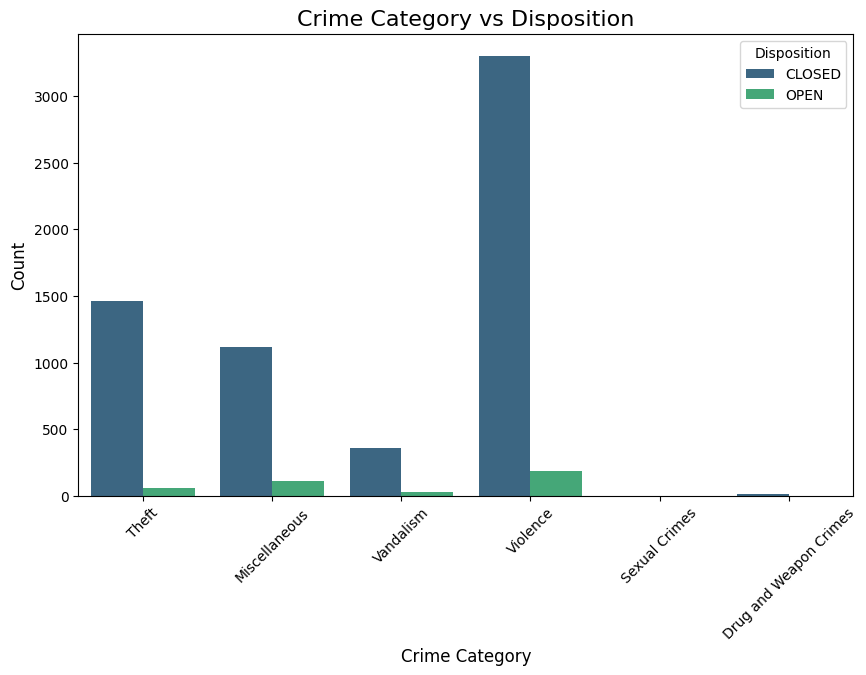

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Disposition', palette='viridis')
plt.title('Crime Category vs Disposition', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [30]:
data["Disposition"].value_counts()

Disposition
CLOSED    6256
OPEN       382
Name: count, dtype: int64

C:\Users\salih\AppData\Local\Temp\ipykernel_23760\825182095.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disposition', data=df, palette='viridis')


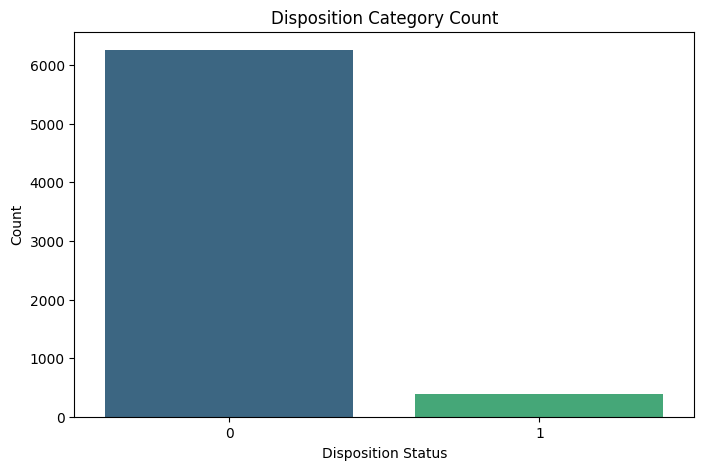

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Disposition', data=df, palette='viridis')
plt.title('Disposition Category Count')
plt.xlabel('Disposition Status')
plt.ylabel('Count')
plt.show()

In [26]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    original_values = df[column].unique()
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    encoded_values = df[column].unique()
    decoded_values = label_encoders[column].inverse_transform(encoded_values)

In [27]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Özellik ve hedef değişkeni ayır
X = df.drop(columns=['Disposition'])
y = df['Disposition']

# 2. Eğitim ve test kümelerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SMOTE uygulama (sadece eğitim verisine!)
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.ravel())

# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# 5. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# 6. KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test)

print("\n=== KNN Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


C:\Users\salih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\salih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  w

=== Random Forest ===
Accuracy: 0.9149096385542169
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1253
           1       0.27      0.31      0.29        75

    accuracy                           0.91      1328
   macro avg       0.62      0.63      0.62      1328
weighted avg       0.92      0.91      0.92      1328

Confusion Matrix:
[[1192   61]
 [  52   23]]

=== Logistic Regression ===
Accuracy: 0.677710843373494
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1253
           1       0.10      0.60      0.17        75

    accuracy                           0.68      1328
   macro avg       0.53      0.64      0.49      1328
weighted avg       0.92      0.68      0.76      1328

Confusion Matrix:
[[855 398]
 [ 30  45]]

=== KNN Classifier ===
Accuracy: 0.8087349397590361
Classification Report:
              precision    rec